In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
original_dataset = pd.read_csv("../data/train/train_feature.csv", index_col='id')
original_dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian


In [3]:
string_columns = ['center_type', 'category', 'cuisine']
for column in string_columns:
    original_dataset[column] = LabelEncoder().fit_transform(original_dataset[column])
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 14 columns):
num_orders               456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null int64
op_area                  456548 non-null float64
category                 456548 non-null int64
cuisine                  456548 non-null int64
dtypes: float64(3), int64(11)
memory usage: 52.2 MB


# Correlation between variables

In [4]:
# Copying dataset, so that copy can be modified for analysis purpose
dataset = original_dataset.copy()

Plotting the heatmap of correlation between variables

In [5]:
correlation = dataset.corr()
correlation

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
num_orders,1.000000,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,0.041596,0.029744,-0.038199,0.176976,0.026520,0.127653
week,-0.017210,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,0.000405,0.004600,0.000049,0.001550,0.003802,-0.018096
center_id,-0.053035,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,0.061078,-0.003426,-0.107398,-0.111869,-0.008446,-0.020980
meal_id,0.010597,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,-0.003198,-0.001662,-0.006158,-0.001546,0.249541,0.165249
checkout_price,-0.282108,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.004805,-0.003648,-0.015923,0.021569,0.277529,-0.686125
base_price,-0.222306,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.002054,-0.001934,-0.013596,0.018031,0.282205,-0.720500
emailer_for_promotion,0.277147,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,-0.005234,-0.007462,0.006194,-0.019462,0.095683,-0.151910
homepage_featured,0.294490,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.008640,0.003605,-0.030041,0.041498,0.000885,-0.014629
city_code,0.041596,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,1.000000,0.042686,0.091500,0.131476,0.007676,0.013208
region_code,0.029744,0.004600,-0.003426,-0.001662,-0.003648,-0.001934,-0.007462,0.003605,0.042686,1.000000,-0.009658,0.023327,0.005776,0.017213


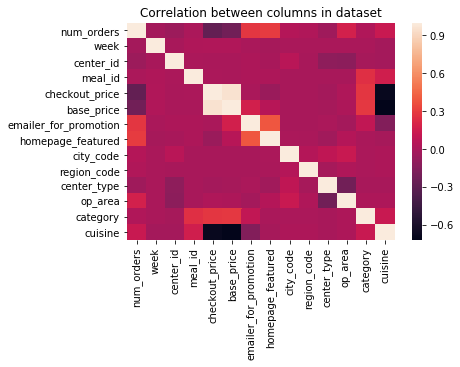

In [6]:
_ = sns.heatmap(correlation)
_ = plt.title("Correlation between columns in dataset")
plt.show()

The checkout price and base price has high correlation with each other but less correlation with number of orders.<br>
Let's convert them into discount and check it's correlation with other variables.<br>

In [7]:
dataset['discount'] = dataset['base_price'] - dataset['checkout_price']
dataset = dataset.drop(['base_price','checkout_price'], axis=1)
correlation = dataset.corr()
correlation

,num_orders,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount
num_orders,1.000000,-0.017210,-0.053035,0.010597,0.277147,0.294490,0.041596,0.029744,-0.038199,0.176976,0.026520,0.127653,0.152950
week,-0.017210,1.000000,-0.003450,0.019814,-0.000841,-0.008263,0.000405,0.004600,0.000049,0.001550,0.003802,-0.018096,0.010997
center_id,-0.053035,-0.003450,1.000000,0.009893,0.013658,-0.005043,0.061078,-0.003426,-0.107398,-0.111869,-0.008446,-0.020980,-0.002247
meal_id,0.010597,0.019814,0.009893,1.000000,0.013402,0.016354,-0.003198,-0.001662,-0.006158,-0.001546,0.249541,0.165249,-0.025262
emailer_for_promotion,0.277147,-0.000841,0.013658,0.013402,1.000000,0.390534,-0.005234,-0.007462,0.006194,-0.019462,0.095683,-0.151910,0.552075
homepage_featured,0.294490,-0.008263,-0.005043,0.016354,0.390534,1.000000,0.008640,0.003605,-0.030041,0.041498,0.000885,-0.014629,0.369758
city_code,0.041596,0.000405,0.061078,-0.003198,-0.005234,0.008640,1.000000,0.042686,0.091500,0.131476,0.007676,0.013208,0.008345
region_code,0.029744,0.004600,-0.003426,-0.001662,-0.007462,0.003605,0.042686,1.000000,-0.009658,0.023327,0.005776,0.017213,0.005095
center_type,-0.038199,0.000049,-0.107398,-0.006158,0.006194,-0.030041,0.091500,-0.009658,1.000000,-0.219791,-0.007919,-0.002179,0.005156
op_area,0.176976,0.001550,-0.111869,-0.001546,-0.019462,0.041498,0.131476,0.023327,-0.219791,1.000000,0.014487,0.012654,-0.008267


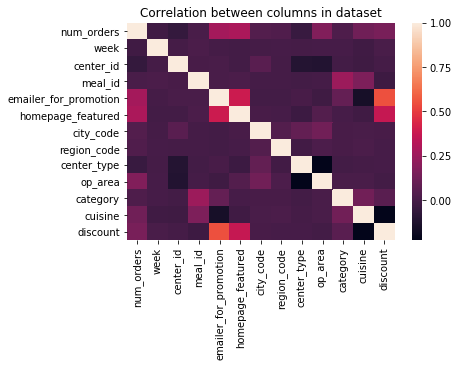

In [8]:
_ = sns.heatmap(correlation)
_ = plt.title("Correlation between columns in dataset")
plt.show()

<p>Discount has correlation with emailer promotion but not with homepage featured.</p>

<p>On looking at the promotion activity, emailer promotion has correlation with homepage featured promotion and both has correlation with number of orders. Let's try combining both variables and then check the correlation.</p>

In [9]:
dataset['promotion'] = dataset['emailer_for_promotion'] + dataset['homepage_featured']
dataset = dataset.drop(['emailer_for_promotion', 'homepage_featured'], axis=1)
correlation = dataset.corr()
correlation

,num_orders,week,center_id,meal_id,city_code,region_code,center_type,op_area,category,cuisine,discount,promotion
num_orders,1.000000,-0.017210,-0.053035,0.010597,0.041596,0.029744,-0.038199,0.176976,0.026520,0.127653,0.152950,0.343138
week,-0.017210,1.000000,-0.003450,0.019814,0.000405,0.004600,0.000049,0.001550,0.003802,-0.018096,0.010997,-0.005749
center_id,-0.053035,-0.003450,1.000000,0.009893,0.061078,-0.003426,-0.107398,-0.111869,-0.008446,-0.020980,-0.002247,0.004418
meal_id,0.010597,0.019814,0.009893,1.000000,-0.003198,-0.001662,-0.006158,-0.001546,0.249541,0.165249,-0.025262,0.017943
city_code,0.041596,0.000405,0.061078,-0.003198,1.000000,0.042686,0.091500,0.131476,0.007676,0.013208,0.008345,0.002592
region_code,0.029744,0.004600,-0.003426,-0.001662,0.042686,1.000000,-0.009658,0.023327,0.005776,0.017213,0.005095,-0.001870
center_type,-0.038199,0.000049,-0.107398,-0.006158,0.091500,-0.009658,1.000000,-0.219791,-0.007919,-0.002179,0.005156,-0.015726
op_area,0.176976,0.001550,-0.111869,-0.001546,0.131476,0.023327,-0.219791,1.000000,0.014487,0.012654,-0.008267,0.015625
category,0.026520,0.003802,-0.008446,0.249541,0.007676,0.005776,-0.007919,0.014487,1.000000,0.132044,0.059997,0.054082
cuisine,0.127653,-0.018096,-0.020980,0.165249,0.013208,0.017213,-0.002179,0.012654,0.132044,1.000000,-0.223935,-0.094310


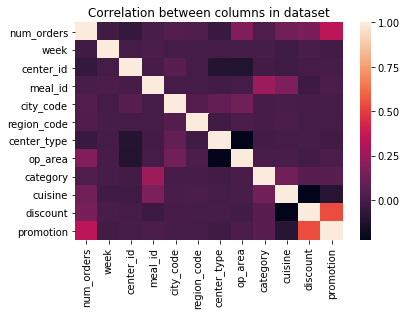

In [10]:
_ = sns.heatmap(correlation)
_ = plt.title("Correlation between columns in dataset")
plt.show()